# IFD

## 1:  Loading Data

In [1]:
import pandas as pd

In [2]:
#!pip install theano
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns',100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
#import theano.sandbox.cuda
#theano.sandbox.cuda.use("gpu0.9")

In [4]:
from pycaret.datasets import get_data

In [5]:
dataset = pd.read_excel('MBdata.xlsx')
dataset

,Date,rockphos,Crude Oil,NaturalGas,Rice,Maize,Coffee,Tea,Cotton,Rubber,Gold,Iron-Ore,Lead,Silver,Zinc,Plywood
0,2008-07-01,240.0,132.83,11.15,731.75,265.34,3.25,2.41,1.70,3.20,939.77,180.50,1944.91,18.03,1852.37,647.87
1,2008-08-01,290.0,114.57,8.25,693.50,235.03,3.23,2.60,1.72,2.93,839.03,178.74,1923.58,14.64,1723.28,649.25
2,2008-06-01,190.0,131.52,12.68,757.00,287.11,3.22,2.31,1.70,3.22,889.49,183.93,1863.05,16.97,1894.48,647.30
3,2008-05-01,190.0,122.63,11.23,901.80,243.46,3.13,2.14,1.63,3.05,888.66,192.95,2234.63,17.06,2182.10,648.18
4,2008-09-01,278.0,99.66,7.69,683.80,233.85,3.16,2.57,1.62,2.83,829.93,139.64,1868.36,12.37,1735.48,648.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,1993-05-01,31.5,18.17,2.17,184.75,98.59,1.37,1.42,1.33,0.81,367.18,29.09,407.20,4.46,980.40,751.81
357,1993-06-01,31.5,17.47,1.97,189.00,92.76,1.38,1.48,1.30,0.81,371.89,29.09,393.90,4.38,926.00,745.30
358,1993-08-01,31.5,16.48,2.26,209.00,100.31,1.70,1.51,1.22,0.82,378.84,29.09,388.40,4.84,884.00,703.88
359,1993-07-01,31.5,16.32,2.06,200.75,101.25,1.58,1.59,1.27,0.81,392.19,29.09,388.20,5.02,927.60,696.18


In [6]:
dataset.describe()

,rockphos,Crude Oil,NaturalGas,Rice,Maize,Coffee,Tea,Cotton,Rubber,Gold,Iron-Ore,Lead,Silver,Zinc,Plywood
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,80.333490,49.051773,3.752133,361.040637,151.952770,2.921496,2.019501,1.635900,1.697535,804.976233,70.381413,1332.548726,12.384294,1717.910914,513.472188
std,69.475885,30.967634,2.158352,131.502248,60.799934,1.126126,0.528967,0.513535,1.009756,511.212947,47.971542,793.989059,8.635855,789.447105,84.951182
min,31.500000,10.410000,1.190000,163.750000,75.270000,1.170000,1.240000,0.820000,0.490000,256.080000,26.470000,375.700000,3.650000,747.600000,335.250000
25%,33.500000,20.150000,2.250000,262.000000,104.210000,2.000000,1.540000,1.290000,0.880000,354.450000,30.030000,532.100000,5.020000,1035.800000,452.140000
50%,44.000000,43.440000,2.960000,329.200000,147.290000,2.850000,1.940000,1.580000,1.480000,596.150000,59.090000,1132.740000,10.380000,1520.360000,508.190000
75%,98.500000,68.580000,4.610000,442.000000,172.000000,3.500000,2.390000,1.850000,2.150000,1266.550000,93.700000,2044.550000,17.170000,2276.830000,570.790000
max,450.000000,132.830000,13.520000,907.000000,333.050000,6.620000,3.390000,5.060000,6.260000,1968.630000,207.720000,3719.720000,42.700000,4405.400000,751.810000


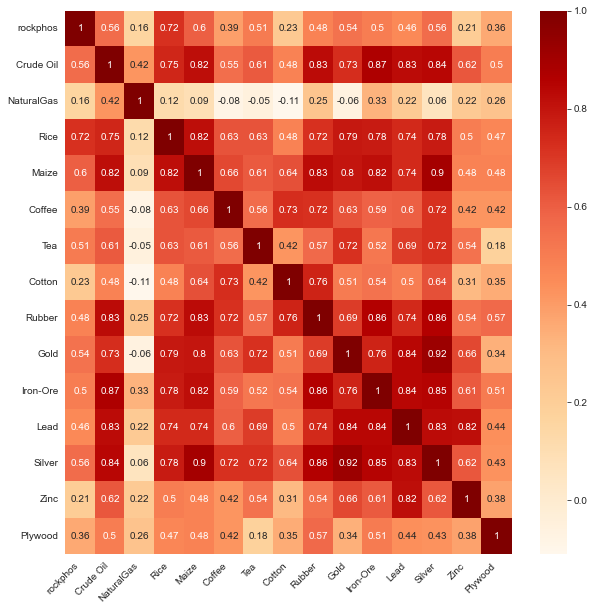

In [7]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
#corr_list=['age','months_as_customer','total_claim_amount',
#           'injury_claim', 'property_claim','vehicle_claim',
#           'incident_severity','fraud_reported']
#,'tclaim_severity_int','iclaim_severity_int','vclaim_severity_int','pclaim_severity_int'
#corr_df = df[corr_list]
corr=round(dataset.corr(),2)

# Set the default matplotlib figure size

fix, ax = plt.subplots(figsize=(10,10))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

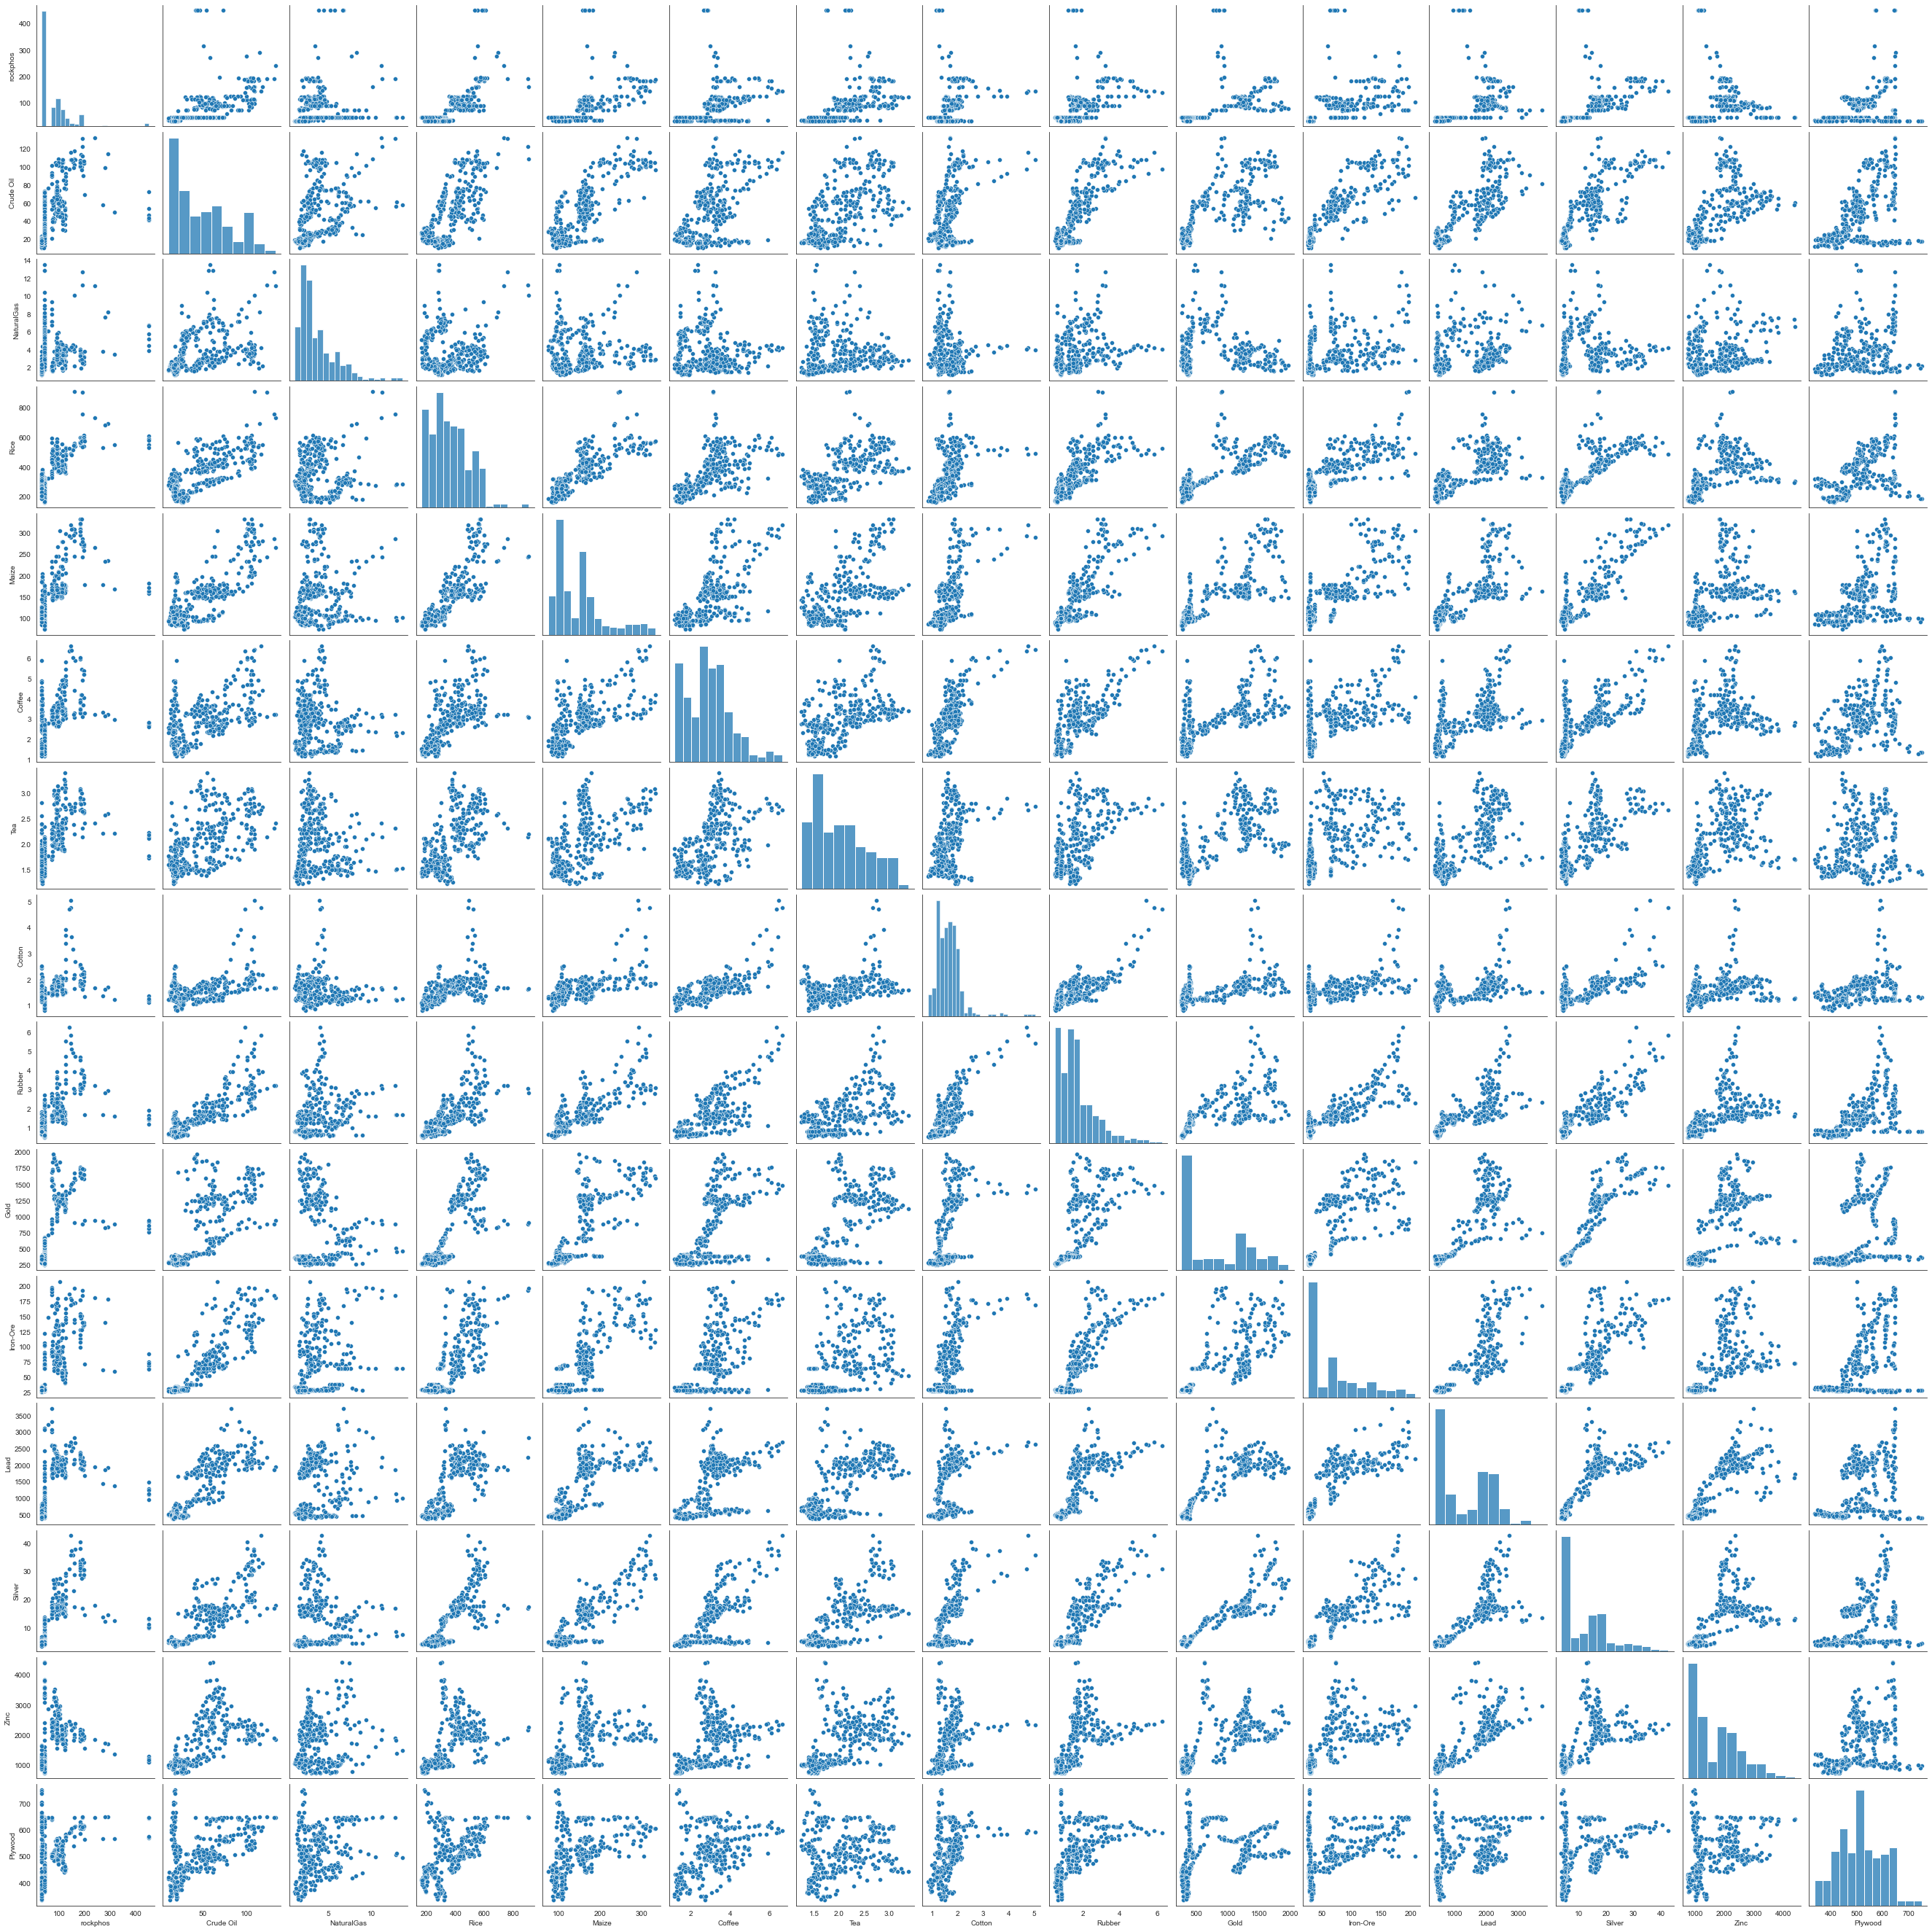

In [8]:
sns.pairplot(dataset)

In [9]:
dataset=dataset[['Zinc','Gold','Silver','Iron-Ore','Crude Oil','rockphos']]
dataset

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos
0,1852.37,939.77,18.03,180.50,132.83,240.0
1,1723.28,839.03,14.64,178.74,114.57,290.0
2,1894.48,889.49,16.97,183.93,131.52,190.0
3,2182.10,888.66,17.06,192.95,122.63,190.0
4,1735.48,829.93,12.37,139.64,99.66,278.0
...,...,...,...,...,...,...
356,980.40,367.18,4.46,29.09,18.17,31.5
357,926.00,371.89,4.38,29.09,17.47,31.5
358,884.00,378.84,4.84,29.09,16.48,31.5
359,927.60,392.19,5.02,29.09,16.32,31.5


In [10]:
data = dataset.sample(frac=0.95, random_state=21)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (343, 6)
Unseen Data For Predictions: (18, 6)


## 2: Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column.

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.


In [11]:
from pycaret.regression import *

In [12]:
data.columns

Index(['Zinc', 'Gold', 'Silver', 'Iron-Ore', 'Crude Oil', 'rockphos'], dtype='object')

In [13]:
dataset.head()

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos
0,1852.37,939.77,18.03,180.50,132.83,240.0
1,1723.28,839.03,14.64,178.74,114.57,290.0
2,1894.48,889.49,16.97,183.93,131.52,190.0
3,2182.10,888.66,17.06,192.95,122.63,190.0
4,1735.48,829.93,12.37,139.64,99.66,278.0


In [16]:
dataset.describe()

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,1717.910914,804.976233,12.384294,70.381413,49.051773,80.333490
std,789.447105,511.212947,8.635855,47.971542,30.967634,69.475885
min,747.600000,256.080000,3.650000,26.470000,10.410000,31.500000
25%,1035.800000,354.450000,5.020000,30.030000,20.150000,33.500000
50%,1520.360000,596.150000,10.380000,59.090000,43.440000,44.000000
75%,2276.830000,1266.550000,17.170000,93.700000,68.580000,98.500000
max,4405.400000,1968.630000,42.700000,207.720000,132.830000,450.000000


In [17]:
classif1 = setup(data = data, target = 'Zinc', normalize=True,session_id=128, fold=5, numeric_imputation= 'mean') 
#fix_imbalance: bool, default = False
#    When training dataset has unequal distribution of target class it can be balanced 
#    using this parameter. When set to True, SMOTE (Synthetic Minority Over-sampling 
#    Technique) is applied by default to create synthetic datapoints for minority class.



,Description,Value
0,session_id,128
1,Target,Zinc
2,Original Data,"(343, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(240, 5)"


In [18]:
data

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos
0,1046.30,356.31,3.96,34.76,19.37,31.5
1,2362.22,1480.89,42.70,179.33,116.24,145.0
2,1000.30,383.14,5.04,30.00,22.26,32.5
3,2071.59,1043.16,17.24,86.79,74.08,90.0
4,1300.14,429.23,7.12,65.00,50.64,44.0
...,...,...,...,...,...,...
338,1372.15,433.85,7.23,65.00,50.94,44.0
339,2026.19,1276.40,17.29,51.98,47.69,110.5
340,1147.20,293.18,5.15,27.59,24.16,44.0
341,2253.22,1175.33,15.97,73.73,76.99,119.5


## 3: Comparing All Models

In [19]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,93.3402,19869.8689,139.6268,0.9671,0.0724,0.0544,0.1300
catboost,CatBoost Regressor,109.7721,27840.2960,164.7390,0.9531,0.0863,0.0627,1.1640
xgboost,Extreme Gradient Boosting,117.0815,34761.5031,183.1246,0.9439,0.1020,0.0691,0.3220
knn,K Neighbors Regressor,137.6031,37722.4891,194.1147,0.9373,0.1033,0.0822,0.0180
rf,Random Forest Regressor,131.2826,38400.9293,194.8592,0.9366,0.1066,0.0764,0.1900
gbr,Gradient Boosting Regressor,142.5172,43740.1396,208.2122,0.9272,0.1168,0.0860,0.0300
lightgbm,Light Gradient Boosting Machine,151.4502,48852.6446,220.7239,0.9176,0.1157,0.0887,0.1900
ada,AdaBoost Regressor,201.8935,64104.1004,252.0144,0.8941,0.1574,0.1375,0.0480
dt,Decision Tree Regressor,168.9907,90435.7541,295.7263,0.8500,0.1476,0.0954,0.0120
ridge,Ridge Regression,371.9339,307569.4969,552.6693,0.4950,0.2838,0.2197,0.0140


In [20]:
model_et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,76.6476,10376.5689,101.8654,0.9813,0.0677,0.0549
1,91.0123,19927.4310,141.1646,0.9626,0.0712,0.0531
2,91.2742,22451.9431,149.8397,0.9706,0.0743,0.0532
3,111.6678,23390.2319,152.9387,0.9623,0.0745,0.0599
4,96.0990,23203.1698,152.3259,0.9588,0.0741,0.0510
Mean,93.3402,19869.8689,139.6268,0.9671,0.0724,0.0544
SD,11.2414,4905.0386,19.3446,0.0081,0.0026,0.0030


In [21]:
tuned_catboost = tune_model(create_model('catboost'),optimize='R2',n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,108.0589,23351.3149,152.8114,0.9580,0.0962,0.0774
1,112.0283,28018.0284,167.3859,0.9474,0.0891,0.0638
2,125.3210,36158.1337,190.1529,0.9527,0.1151,0.0798
3,149.9278,41412.3532,203.5003,0.9332,0.0998,0.0818
4,127.6942,42875.1451,207.0631,0.9239,0.0968,0.0680
Mean,124.6060,34362.9950,184.1827,0.9430,0.0994,0.0742
SD,14.7190,7574.8052,20.9696,0.0126,0.0086,0.0070


In [22]:
tuned_xgboost = tune_model(create_model('xgboost'),optimize='R2',n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,103.6581,23620.0059,153.6880,0.9575,0.0916,0.0707
1,125.3310,32172.5449,179.3671,0.9395,0.0937,0.0737
2,132.5311,32973.2344,181.5853,0.9568,0.1169,0.0846
3,146.9509,40354.9023,200.8853,0.9349,0.1024,0.0802
4,135.2344,48170.1992,219.4771,0.9145,0.1027,0.0709
Mean,128.7411,35458.1773,187.0006,0.9407,0.1015,0.0760
SD,14.3451,8278.7202,22.1126,0.0159,0.0089,0.0055


In [23]:
tuned_dt = tune_model(create_model('dt'),optimize='MAE',n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,147.8888,44471.7075,210.8832,0.9200,0.1320,0.1015
1,176.1925,74254.5619,272.4969,0.8605,0.1532,0.1167
2,172.0064,61214.1794,247.4150,0.9199,0.1347,0.1074
3,254.6839,143086.0513,378.2672,0.7693,0.1849,0.1333
4,188.9245,57484.7036,239.7597,0.8979,0.1351,0.1077
Mean,187.9392,76102.2407,269.7644,0.8735,0.1480,0.1133
SD,35.9213,34810.9250,57.7011,0.0565,0.0199,0.0111


In [24]:
tuned_knn = tune_model(create_model('knn'),optimize='R2',n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,67.6561,9325.7531,96.5699,0.9832,0.0663,0.0489
1,104.0152,23172.8196,152.2262,0.9565,0.0806,0.0613
2,112.4854,33052.1534,181.8025,0.9567,0.0802,0.0591
3,98.7189,23239.3439,152.4446,0.9625,0.0645,0.0503
4,100.9679,22037.0586,148.4488,0.9609,0.0752,0.0535
Mean,96.7687,22165.4257,146.2984,0.9640,0.0733,0.0546
SD,15.2873,7557.2833,27.6080,0.0099,0.0068,0.0048


## Compte tenue du résultat Accuracy retrouvé pour l'ensemble des modèles testé on choisi de conduire la suite de l'étude avec le Top 3 des modèles à savoir: randome Forest, xgboost, decision tree

## 4: Plots of the Models

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

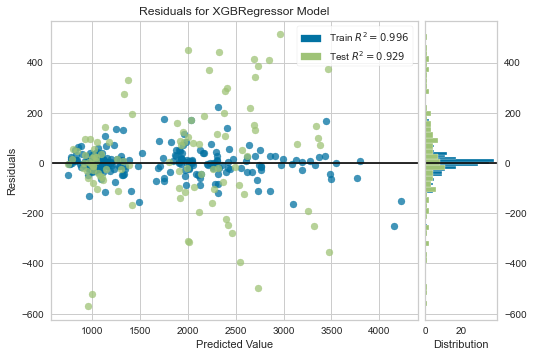

In [25]:
plot_model(tuned_xgboost, plot = 'residuals')

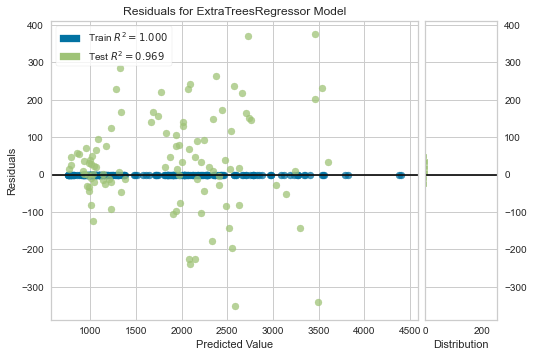

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=128, verbose=0, warm_start=False)


In [26]:
#trained model object is stored in the variable 'dt'. 
plot_model(model_et, plot = 'residuals')
print(model_et)

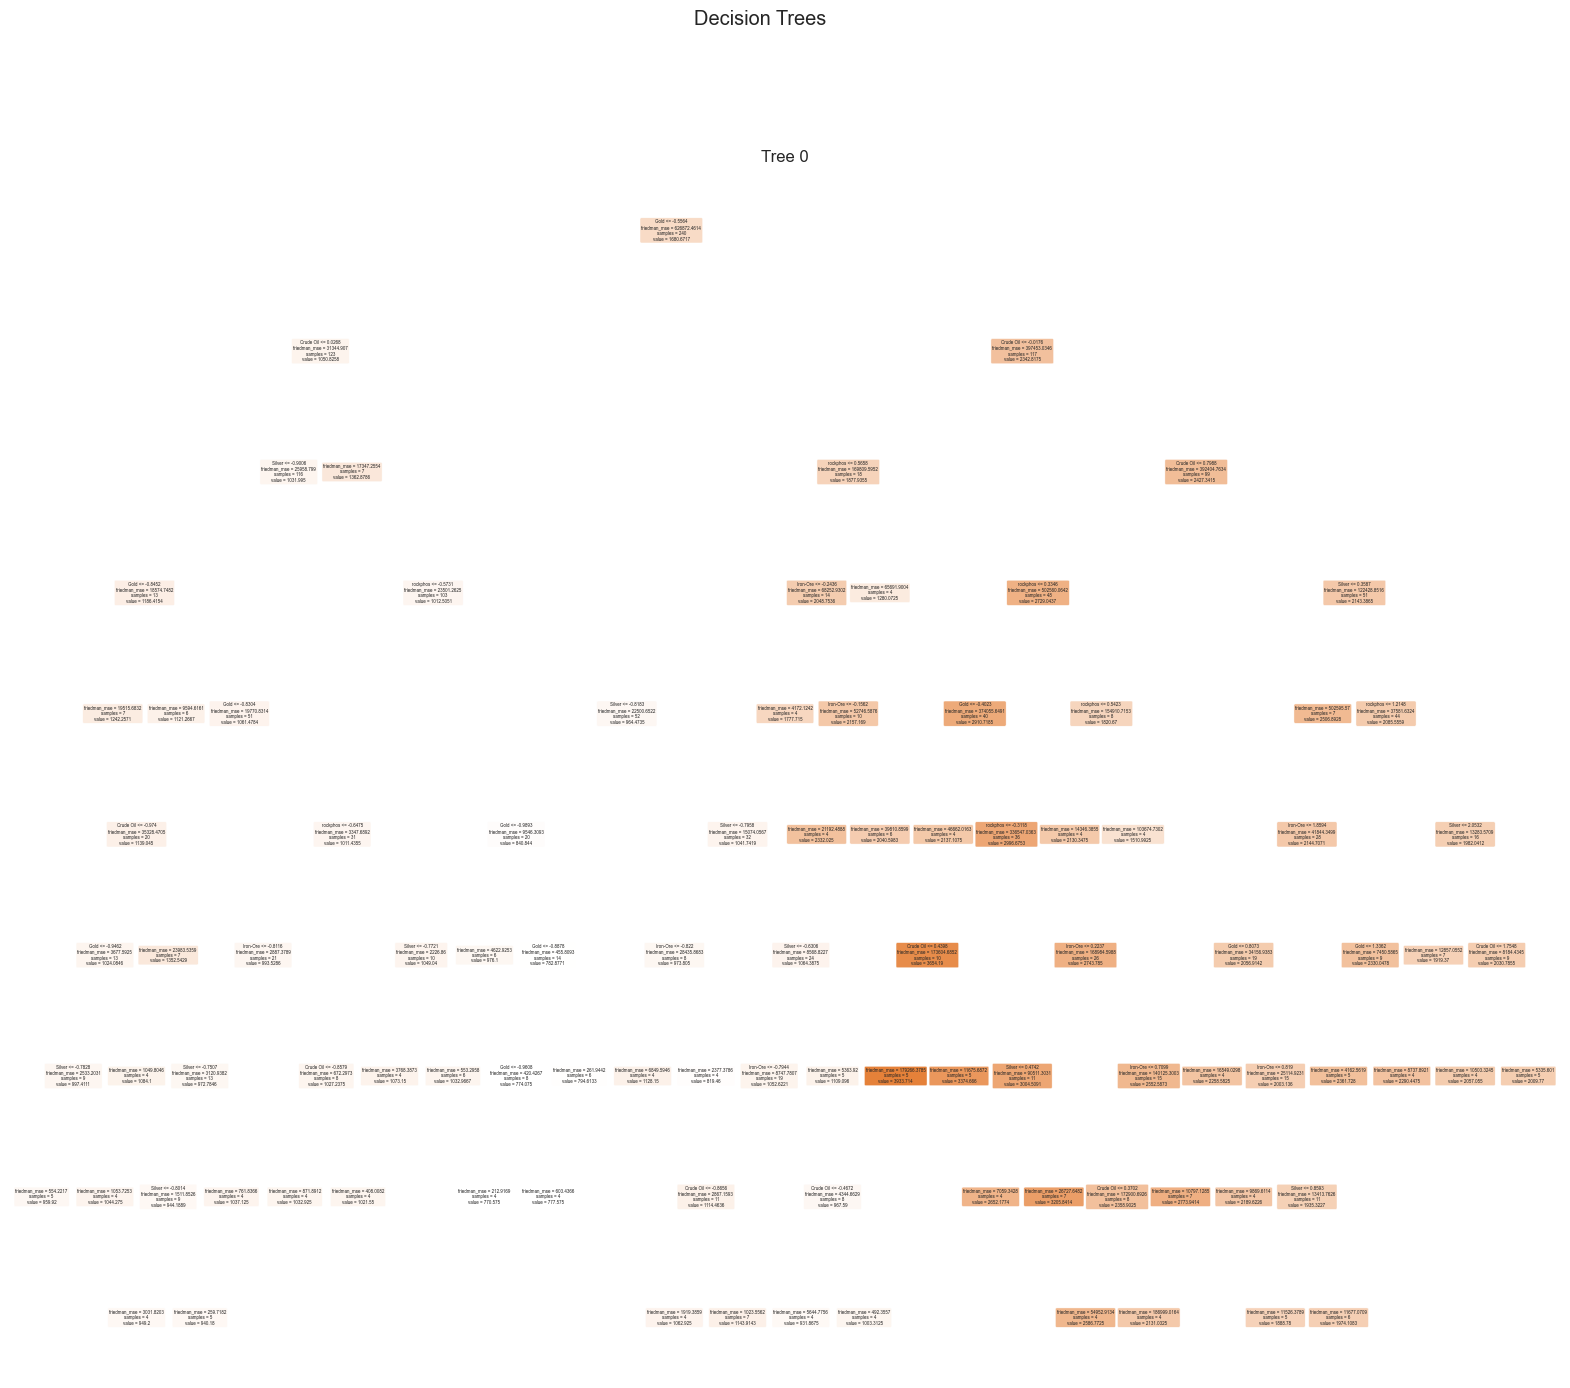

In [27]:
#trained model object is stored in the variable 'et'. 
print(tuned_dt)
plot_model(tuned_dt, plot = 'tree')

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model.
<br/>

By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. For example: `tune_model(dt, optimize = 'AUC')` will search for the hyperparameters of a Decision Tree Classifier that results in the highest `AUC` instead of `Accuracy`. 

## 6 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

### 10.1 AUC Plot

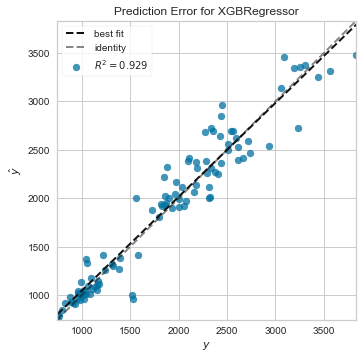

In [28]:
plot_model(tuned_xgboost, plot = 'error')

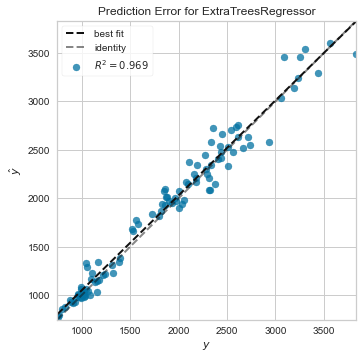

In [29]:
plot_model(model_et, plot = 'error')

### 10.2 Precision-Recall Curve

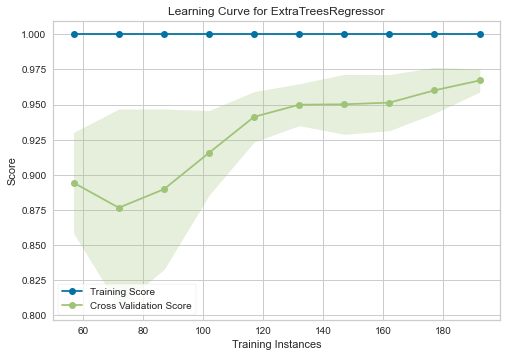

In [30]:
plot_model(model_et, plot = 'learning')

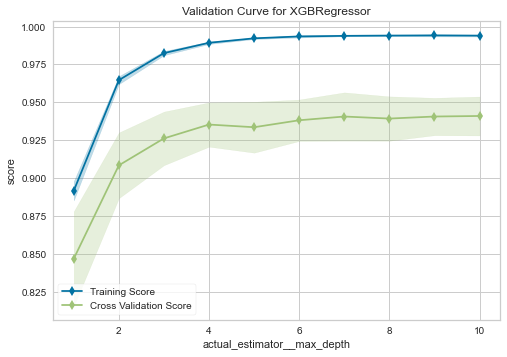

In [31]:
plot_model(tuned_xgboost, plot = 'vc')

### 10.3 Feature Importance Plot

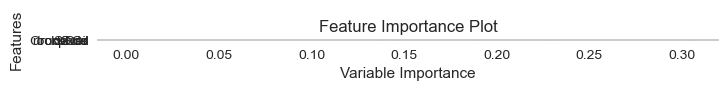

In [32]:
plot_model(model_et, plot = 'feature_all')

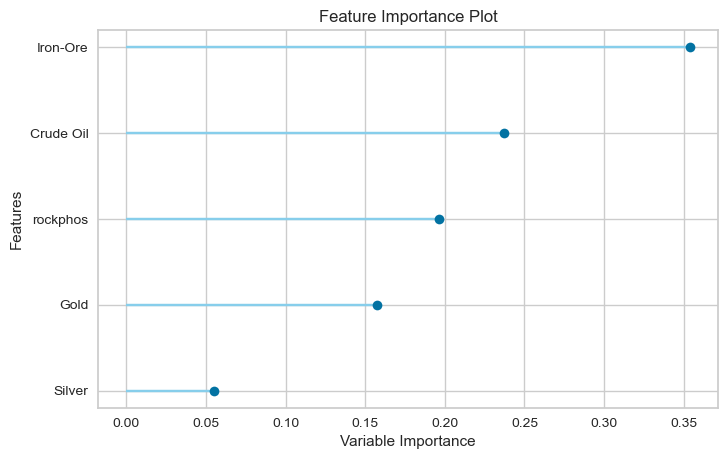

In [33]:
plot_model(tuned_xgboost, plot = 'feature')

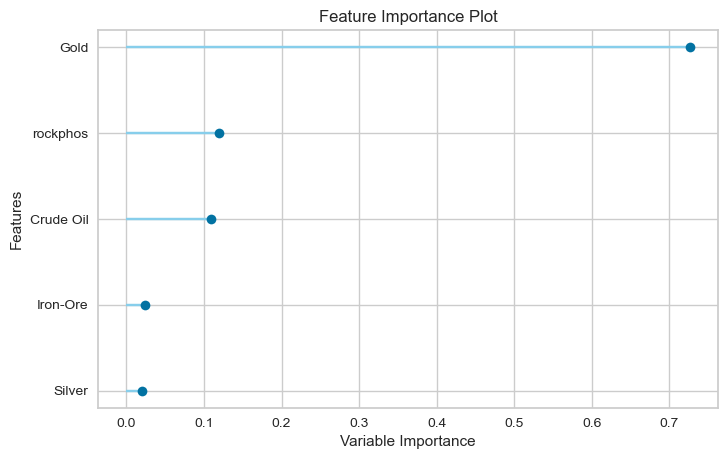

In [34]:
plot_model(tuned_dt, plot = 'feature')

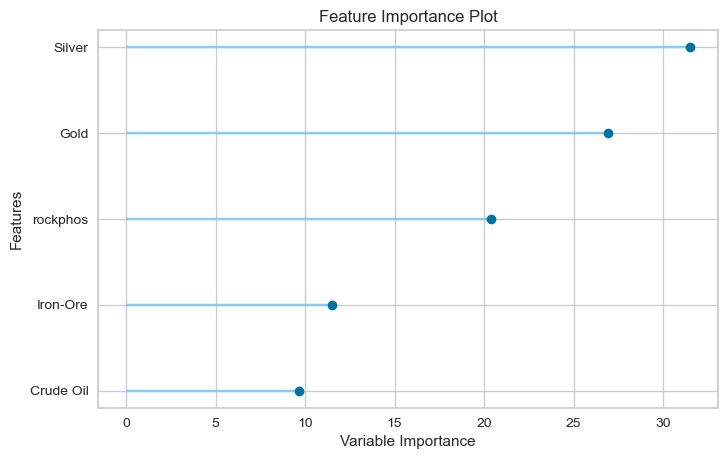

In [35]:
plot_model(tuned_catboost, plot = 'feature')

### 10.3.2 Tree plot

In [36]:
#plot_model(tuned_et, plot = 'tree')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [37]:
evaluate_model(model_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 7: Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (6,841 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_rf` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [38]:
predict_model(tuned_catboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,126.5186,29131.6853,170.6801,0.9495,0.0843,0.0686


In [39]:
predict_model(tuned_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,144.4592,40728.6641,201.8134,0.9294,0.1089,0.0768


In [40]:
predict_model(model_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,97.8144,17876.3295,133.7024,0.9690,0.0684,0.0536


## 8: Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [41]:
final_met = finalize_model(model_et)

In [42]:
final_xgboost = finalize_model(tuned_xgboost)

In [43]:
final_catboost = finalize_model(tuned_catboost)

In [44]:
#Final Random Forest model parameters for deployment
print(final_met)
print(final_xgboost)
print(final_catboost)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=128, verbose=0, warm_start=False)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=128, reg_alpha=0.4,
             reg_lambda=10, scale_pos

## 9: Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 7 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 5% of the original dataset which was never exposed to PyCaret. 

In [45]:
unseen_predictions_met = predict_model(final_met, data=data_unseen)
unseen_predictions_met.head(20)

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos,Label
0,2035.92,1675.95,32.95,144.66,117.79,160.0,2073.149895
1,3602.85,655.66,13.14,103.21,68.19,44.0,3515.870527
2,2671.60,1866.30,24.08,124.36,42.30,82.5,2466.905157
3,2850.60,1300.90,15.30,86.47,63.79,98.5,2731.460157
4,2375.95,1134.72,17.64,105.07,74.88,90.0,2189.746147
5,1019.10,399.45,5.46,30.00,17.80,33.5,1047.013034
6,1180.21,442.08,7.09,37.90,39.04,44.0,1081.321381
7,975.81,400.51,6.66,37.90,42.08,44.0,1000.478194
8,1086.50,355.11,4.77,30.15,23.23,32.5,1193.144023
9,1653.50,324.01,4.50,30.15,18.70,32.5,1535.285008


In [46]:
unseen_predictions_catboost = predict_model(final_catboost, data=data_unseen)
unseen_predictions_catboost.head(20)

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos,Label
0,2035.92,1675.95,32.95,144.66,117.79,160.0,1982.380317
1,3602.85,655.66,13.14,103.21,68.19,44.0,3463.246003
2,2671.60,1866.30,24.08,124.36,42.30,82.5,2396.582483
3,2850.60,1300.90,15.30,86.47,63.79,98.5,2759.295127
4,2375.95,1134.72,17.64,105.07,74.88,90.0,2234.653273
5,1019.10,399.45,5.46,30.00,17.80,33.5,1027.507049
6,1180.21,442.08,7.09,37.90,39.04,44.0,1171.564979
7,975.81,400.51,6.66,37.90,42.08,44.0,1010.939981
8,1086.50,355.11,4.77,30.15,23.23,32.5,1139.199268
9,1653.50,324.01,4.50,30.15,18.70,32.5,1241.416819


In [47]:
unseen_predictions_xgboost = predict_model(final_xgboost, data=data_unseen)
unseen_predictions_xgboost.head(10)

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos,Label
0,2035.92,1675.95,32.95,144.66,117.79,160.0,2150.242920
1,3602.85,655.66,13.14,103.21,68.19,44.0,3606.585205
2,2671.60,1866.30,24.08,124.36,42.30,82.5,2477.077881
3,2850.60,1300.90,15.30,86.47,63.79,98.5,2710.792969
4,2375.95,1134.72,17.64,105.07,74.88,90.0,2084.128906
5,1019.10,399.45,5.46,30.00,17.80,33.5,1050.856445
6,1180.21,442.08,7.09,37.90,39.04,44.0,949.773560
7,975.81,400.51,6.66,37.90,42.08,44.0,1020.646179
8,1086.50,355.11,4.77,30.15,23.23,32.5,1118.909058
9,1653.50,324.01,4.50,30.15,18.70,32.5,1359.880249


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `default` available. To do that we will use `pycaret.utils` module. See example below:

In [48]:
from pycaret.utils import check_metric
check_metric(unseen_predictions_met['Zinc'], unseen_predictions_met['Label'], metric = 'R2')

0.9841

In [49]:
check_metric(unseen_predictions_xgboost['Zinc'], unseen_predictions_xgboost['Label'], metric = 'R2')

0.969

In [50]:
check_metric(unseen_predictions_catboost['Zinc'], unseen_predictions_catboost['Label'], metric = 'R2')

0.9711

plot_model(unseen_predictions_svm, plot = 'feature_all')

## 10.0 Saving the model

We have now finished the experiment by finalizing the `tuned_rf` model which is now stored in `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [51]:
save_model(final_met,'zinc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Zinc',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    

## 11: Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [52]:
saved_final_met = load_model('Zinc')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function.

In [53]:
new_prediction = predict_model(saved_final_met, data=data_unseen)

In [54]:
new_prediction.head()

,Zinc,Gold,Silver,Iron-Ore,Crude Oil,rockphos,Label
0,2035.92,1675.95,32.95,144.66,117.79,160.0,2073.149895
1,3602.85,655.66,13.14,103.21,68.19,44.0,3515.870527
2,2671.60,1866.30,24.08,124.36,42.30,82.5,2466.905157
3,2850.60,1300.90,15.30,86.47,63.79,98.5,2731.460157
4,2375.95,1134.72,17.64,105.07,74.88,90.0,2189.746147


In [55]:
from pycaret.utils import check_metric
check_metric(new_prediction['Zinc'], new_prediction['Label'], metric = 'R2')

0.9841